# Question 1 : Classification using Naive Bayes
Can glucose and blood pressure data classify whether a patient has diabetes or not ? If yes, which classification algorithm should you use ?

The dataset diabetes_classification.csv has 3 columns and 995 entries with the above data.

1.Load the dataset.

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('diabetes1.csv')
df

,glucose,bloodpressure,diabetes
0,40,85,0
1,40,92,0
2,45,63,1
3,45,80,0
4,40,73,1
...,...,...,...
990,45,87,0
991,40,83,0
992,40,83,0
993,40,60,1


2.The dataset has two feature columns and one target column. Plot a bar graph or histogram showing the distribution of values in the feature columns (count of each value).

(array([  3.,  10.,  27.,  68., 264., 365., 162.,  64.,  22.,  10.]),
 array([20., 25., 30., 35., 40., 45., 50., 55., 60., 65., 70.]),
 <BarContainer object of 10 artists>)

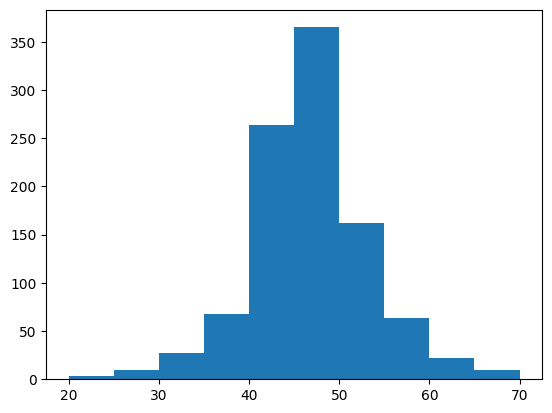

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(df['glucose'])

(array([  2.,   8.,  44., 124., 150., 139., 162., 214., 128.,  24.]),
 array([ 50.,  55.,  60.,  65.,  70.,  75.,  80.,  85.,  90.,  95., 100.]),
 <BarContainer object of 10 artists>)

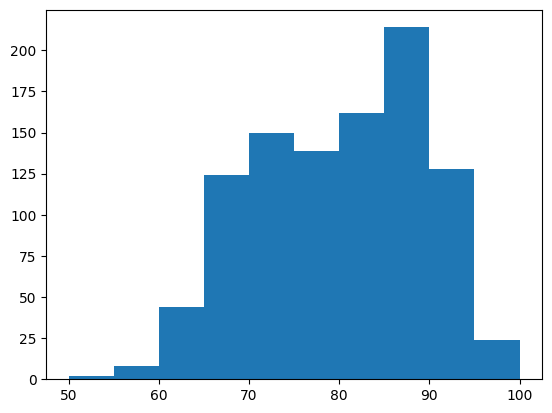

In [5]:
plt.hist(df['bloodpressure'])

The feature column glucose has a somewhat Gaussian distribution of data. So we will try out Gaussian Naive Bayes classification for the data using Scikit-Learn.

3.Split the dataset.
4.Fit a Gaussian NB model on the data. Make predictions and find the accuracy score.
Optional : 
5.Compare the model with other classification algorithms like Logistic Regression, KNN, decision tree etc.# 

In [6]:
X = df.drop('diabetes',axis='columns')
y = df.diabetes

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [8]:
from sklearn.naive_bayes import GaussianNB
clg = GaussianNB()
clg.fit(X_train,y_train)

GaussianNB()

In [9]:
clg.score(X_test,y_test)

0.9240121580547113

In [10]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [11]:
knn.score(X_test,y_test)

0.9300911854103343

In [12]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [13]:
lr.score(X_test,y_test)

0.9179331306990881

In [14]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [15]:
dt.score(X_test,y_test)

0.9270516717325228

# Question 2 : Regression using SVM and Tree Algorithms
In this question, we will be using the insurance.csv file which contain information on insurance charges based on the following informations: age,sex,bmi,region,number of children and whether the person is a smoker or not. You need to predict the charges based on the information given.

1.Load the data.

In [16]:
import pandas as pd
import numpy as np

In [17]:
df1 = pd.read_csv('insurance1.csv')
df1

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


2.Separate the numerical and categorical columns.
3.Label Encode the categorical columns.
4.Scale the numerical columns. (Scale the charges separately so that you can calculate errors afterwards.)

In [18]:
df1_numerical_features = df1.select_dtypes(exclude='object')
df1_categorical_features = df1.select_dtypes(include='object')

In [19]:
df1_numerical_features

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520
...,...,...,...,...
1333,50,30.970,3,10600.54830
1334,18,31.920,0,2205.98080
1335,18,36.850,0,1629.83350
1336,21,25.800,0,2007.94500


In [20]:
df1_categorical_features

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest
...,...,...,...
1333,male,no,northwest
1334,female,no,northeast
1335,female,no,southeast
1336,female,no,southwest


In [21]:
from sklearn.preprocessing import LabelEncoder
sex = LabelEncoder()
smoker = LabelEncoder()
region = LabelEncoder()

In [22]:
df1['sex'] = sex.fit_transform(df1['sex'])
df1['smoker'] = smoker.fit_transform(df1['smoker'])
df1['region'] = region.fit_transform(df1['region'])

In [23]:
df1

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [26]:
X = df1.drop('charges',axis='columns')
y = df1.iloc[:,-1].values
print(y)
y=y.reshape(len(y),1)
y

[16884.924   1725.5523  4449.462  ...  1629.8335  2007.945  29141.3603]


array([[16884.924 ],
       [ 1725.5523],
       [ 4449.462 ],
       ...,
       [ 1629.8335],
       [ 2007.945 ],
       [29141.3603]])

In [27]:
from sklearn.preprocessing import MinMaxScaler
ss = MinMaxScaler()
X_scaled=ss.fit_transform(X)
y_scaled = ss.fit_transform(y)

In [28]:
X_scaled

array([[0.02173913, 0.        , 0.3212268 , 0.        , 1.        ,
        1.        ],
       [0.        , 1.        , 0.47914985, 0.2       , 0.        ,
        0.66666667],
       [0.2173913 , 1.        , 0.45843422, 0.6       , 0.        ,
        0.66666667],
       ...,
       [0.        , 0.        , 0.56201238, 0.        , 0.        ,
        0.66666667],
       [0.06521739, 0.        , 0.26472962, 0.        , 0.        ,
        1.        ],
       [0.93478261, 0.        , 0.35270379, 0.        , 1.        ,
        0.33333333]])

In [29]:
y_scaled

array([[0.25161076],
       [0.00963595],
       [0.05311516],
       ...,
       [0.00810808],
       [0.01414352],
       [0.44724873]])

5.Split the data.

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.33, random_state=42)

6.Support Vector Regressor
Here , you will use the SVR model from sklearn.svm and fit it on the training data. Then predict on the test data and calaculate MAE, MSE. But...

The SVR class contains many hyperparameters, example : kernel can have the following values : linear, rbf, poly, sigmoid.

Use RandomizedSearchCV from sklearn.model_selection , create a dictionary with keys 'kernel' and 'gamma' . As values of the keys, create a list of some possible values. Run a 3-fold cross validation test (cv=3) and find the best parameters. Then initiate the SVR model with those parameters.

In [31]:
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')
clg = SVR(kernel='rbf')
clg.fit(X_train,y_train)

SVR()

In [32]:
y_pred=clg.predict(X_test)
clg.score(X_test,y_test)

0.7240364779727948

In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print(mean_absolute_error(y_pred,y_test))
print(mean_squared_error(y_pred,y_test))

0.09509786793582345
0.010303850769503069


7.AdaBoost Regressor
We would do similar for AdaBoostRegressor from sklearn.ensemble . Here, the hyperparameters are n_estimators and loss.

Instead of RandomizedSearchCV, let's try GridSearchCV . Find the best parameters and then find errors on test data using the model with best parameters.

In [34]:
from sklearn.ensemble import AdaBoostRegressor
adbr = AdaBoostRegressor()
param_grid_adaboost = {
     'n_estimators' : [20,40,50,60],
     'loss': ['linear', 'square']
}
from sklearn.model_selection import GridSearchCV

adbr_cv = GridSearchCV(adbr, param_grid_adaboost, cv=3)
adbr_cv.fit(X_train,y_train)
print(adbr_cv.best_estimator_ , adbr_cv.best_params_)

AdaBoostRegressor(n_estimators=40) {'loss': 'linear', 'n_estimators': 40}


   8.Now carry the same procedure for Random Forest Regressor and for Gradient Boosting Regression.
   9.Finally, use XGBoost Regressor and compare all the models. Comment which model had the least error (MAE and MSE).
You will be required to run  !pip install xgboost  to import xgboost models.

In [38]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(X_train,y_train)

GradientBoostingRegressor()

In [39]:
y_pred = gbr.predict(X_test)
print(mean_absolute_error(y_pred,y_test))
print(mean_squared_error(y_pred,y_test))

0.03988122651048154
0.005273780789434226


In [96]:
!pip install xgboost

In [98]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [101]:
y_pred1 = xgb.predict(X_test)
print(mean_absolute_error(y_pred1,y_test))
print(mean_squared_error(y_pred1,y_test))

0.06990881458966565
0.06990881458966565


# Question 3 : Classification using SVM and Tree Algorithms
In this question, we will be using the bookmyshow_ads.csv file which contain information on whether an url is spam or not based on 32 features. You need to classify the url as spam or not spam based on the information given.

1.Load the data.

In [102]:
import pandas  as pd

In [105]:
df2 = pd.read_csv('bookmyshow.csv')
df2

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,0,1,1,1,0,0,0,0,0,...,1,1,0,0,0,0,1,1,0,0
1,2,1,1,1,1,1,0,-1,1,0,...,1,1,0,0,-1,0,1,1,1,0
2,3,1,-1,1,1,1,0,0,0,0,...,1,1,1,0,1,0,1,-1,0,0
3,4,1,-1,1,1,1,0,0,0,1,...,1,1,0,0,1,0,1,0,1,0
4,5,1,-1,0,1,1,0,1,1,0,...,0,1,0,0,-1,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11050,11-151,1,0,1,0,1,1,1,1,0,...,0,0,1,1,0,0,1,1,1,1
11051,11-15-1,0,1,1,0,0,0,1,0,0,...,0,1,1,1,1,1,1,0,1,0
11052,11-153,1,0,1,1,1,0,1,0,0,...,1,1,1,1,1,0,1,-1,1,0
11053,11-154,0,0,1,1,1,0,0,0,1,...,0,1,1,1,1,0,1,1,1,0


In [106]:
df2.dtypes

index                          object
having_IPhaving_IP_Address      int64
URLURL_Length                   int64
Shortining_Service              int64
having_At_Symbol                int64
double_slash_redirecting        int64
Prefix_Suffix                   int64
having_Sub_Domain               int64
SSLfinal_State                  int64
Domain_registeration_length     int64
Favicon                         int64
port                            int64
HTTPS_token                     int64
Request_URL                     int64
URL_of_Anchor                   int64
Links_in_tags                   int64
SFH                             int64
Submitting_to_email             int64
Abnormal_URL                    int64
Redirect                        int64
on_mouseover                    int64
RightClick                      int64
popUpWidnow                     int64
Iframe                          int64
age_of_domain                   int64
DNSRecord                       int64
web_traffic 

In [107]:
X = df2.drop(['Result','index'],axis = 'columns')
y = df2.Result

2.Split the data.

In [108]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33, random_state=42)

# 3. Model Comparison
Similar to the previous question, use the following classifier models from sklearn and compare them:

1.Decision Tree
2.Random Forest
3.Adaboost
4.Gradient Boost
5.XGBoost
For each model, you may also try to find the best hyperparameters using GridSearch Cross Validation or RandomizedSearch Cross Validation.

In [110]:
from  sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [111]:
dtc.score(X_test,y_test)

0.9583447519868458

In [112]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=400)
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=400)

In [113]:
rf.score(X_test,y_test)

0.9690326116744313

In [114]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=50)
clf.fit(X_train,y_train)

AdaBoostClassifier()

In [115]:
clf.score(X_test,y_test)

0.9377911756645656

In [116]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=500)
gbc.fit(X_train,y_train)

GradientBoostingClassifier(n_estimators=500)

In [117]:
gbc.score(X_test,y_test)

0.9616333241984105

In [118]:
from xgboost import XGBRegressor
xg = XGBRegressor()
xg.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [119]:
xg.score(X_test,y_test)

0.8818188900593091

In [120]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(DecisionTreeClassifier(),X,y)
score.mean()

0.9526910900045229

In [121]:
score = cross_val_score(RandomForestClassifier(n_estimators=400),X,y)
score.mean()

0.9676164631388511

In [122]:
score = cross_val_score(GradientBoostingClassifier(n_estimators=500),X,y)
score.mean()

0.9556761646313886

In [123]:
AdaBoostClassifier(n_estimators=50)

AdaBoostClassifier()

In [124]:
score = cross_val_score(XGBRegressor(),X,y)
score.mean()

0.8774902143063503

# Question 4 : Clustering
Customer Segmentation is the subdivision of a market into discrete customer groups that share similar characteristics. Customer Segmentation can be a powerful means to identify unsatisfied customer needs.

The csv file segmentation data.csv contains basic data about some customers like Customer ID, age, gender, annual income and spending score. You want to classify the customers into different groups so that marketing strategy could be planned in the future accordingly. How many different groups should be made ? What should be the approach ?

This is an Unsupervised Learning question since it doesn't provide you with labels - the groups.
1. Import the necessary modules

In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

2. Read the csv file "segmentation data.csv" present in the Github repository as a Pandas DataFrame.

In [127]:
df3 = pd.read_csv('segmentation.csv')
df3

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1
...,...,...,...,...,...,...,...,...
1995,100001996,1,0,47,1,123525,0,0
1996,100001997,1,1,27,1,117744,1,0
1997,100001998,0,0,31,0,86400,0,0
1998,100001999,1,1,24,1,97968,0,0


3. Do the necessary preprocessing of the data.
Drop unwanted columns.

Check for null values.

Scale the numerical columns.

Additionally, you may also make the Age column have categorical values. How ? Apply some function that makes age groups turns all ages in some group to a particular number !

Note : Don't do everything in a single code block ! Do it step-by-step and show output for each step.

In [129]:
ndata = df3.drop('ID',axis = 'columns')
ndata

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,67,2,124670,1,2
1,1,1,22,1,150773,1,2
2,0,0,49,1,89210,0,0
3,0,0,45,1,171565,1,1
4,0,0,53,1,149031,1,1
...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0
1996,1,1,27,1,117744,1,0
1997,0,0,31,0,86400,0,0
1998,1,1,24,1,97968,0,0


In [130]:
ndata.isna().sum()

Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

In [131]:
ndata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Sex              2000 non-null   int64
 1   Marital status   2000 non-null   int64
 2   Age              2000 non-null   int64
 3   Education        2000 non-null   int64
 4   Income           2000 non-null   int64
 5   Occupation       2000 non-null   int64
 6   Settlement size  2000 non-null   int64
dtypes: int64(7)
memory usage: 109.5 KB


In [139]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
income = np.array(df3['Income']).reshape(-1,1)
income = ss.fit_transform(income)
df3.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,INCOME
0,100000001,0,0,67,2,0.097524,1,2,0.097524
1,100000002,1,1,22,1,0.782654,1,2,0.782654
2,100000003,0,0,49,1,-0.833202,0,0,-0.833202
3,100000004,0,0,45,1,1.328386,1,1,1.328386
4,100000005,0,0,53,1,0.736932,1,1,0.736932


4. KMeans Model Training - Scikit-Learn
At first, let's try to implement KMeans Clustering using sklearn.clusters.KMeans .

How to decide for the value 'K' ?

Read the following blog. It provides different ways of evaluating clustering algorithms.

https://www.analyticsvidhya.com/blog/2021/05/k-mean-getting-the-optimal-number-of-clusters

We will be looking on two methods : Elbow Method, Silhouette Analysis.

Make a list of values for K , ranging from 2 to 10. For each K, fit a model, calculate the inertia and silhouette scores. Plot them. Decide which value of K is optimal !

In [140]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=4)
km.fit_transform(ndata)

array([[ 29480.64612894,  45510.70615129, 100454.86917396,
          9841.48846821],
       [  3377.68782707,  71613.69354187,  74351.87011108,
         35944.43659765],
       [ 64940.63510127,  10050.70685174, 135914.86675898,
         25618.56975791],
       ...,
       [ 67750.63533609,   7240.69298066, 138724.86735881,
         28428.56583761],
       [ 56182.63715852,  18808.69458541, 127156.86835845,
         16860.56885893],
       [ 85734.63608082,  10743.30969617, 156708.86791459,
         46412.56657025]])

In [141]:
sse = []
rng = range(2,10)
for k in rng:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(ndata)
    sse.append(kmeans.inertia_)

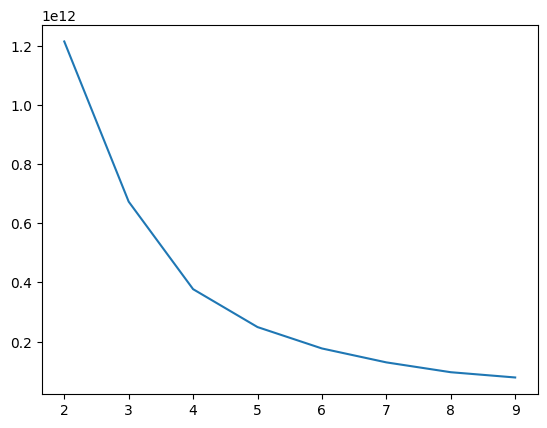

In [142]:
plt.plot(rng,sse)

In [143]:
from sklearn.metrics import silhouette_score

In [144]:
silhotte_avg = []
for k in range(3,10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(ndata)
    cluster_labels = kmeans.labels_
    silhotte_avg.append(silhouette_score(ndata, cluster_labels))

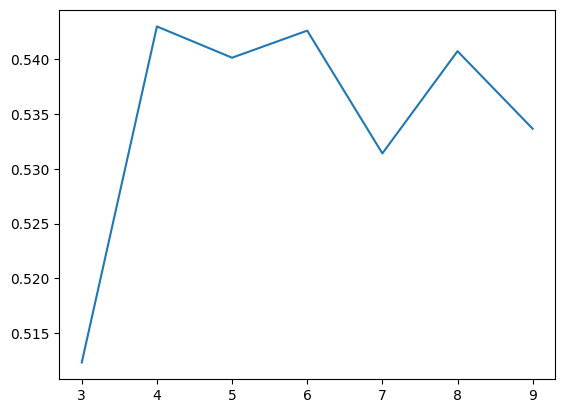

In [145]:
plt.plot(range(3,10),silhotte_avg)

5. KMeans Model Prediction
Once you decided the optimal K, once again fit a model with that K value and store the silhouette score and the labels for the entire data.

It is observed that the optimal value of k is 4. So, let's store the values of inertia and labels for k=4.

In [146]:
km.fit(ndata)
cluster_labels = km.labels_
silscore = silhouette_score(ndata, cluster_labels)
silscore

0.5429921618470235

In [147]:
ine = km.inertia_
ine

377129345438.10693

# 6. KMeans Model Training - Scratch
Now, code the KMeans Model from scratch. Train it on the data, and try to find out when you have the labels with maximum accuracy when compared to the labels of the SkLearn model.

In [148]:
class KMeansScratch:
    def __init__(self, k, max_iter=100):
        self.k = k
        self.max_iter = max_iter
        
    def fit(self, X):
        n_samples, n_features = X.shape
        
        self.centroids = np.random.randn(self.k, n_features)
        
        for i in range(self.max_iter):
            distances = np.sqrt(((X - self.centroids[:, np.newaxis])**2).sum(axis=2))
            labels = np.argmin(distances, axis=0)
            
            centroids = np.array([X[labels == k].mean(axis=0) for k in range(self.k)])
            
            if np.allclose(self.centroids, centroids):
                break
                
            self.centroids = centroids
            
        self.labels_ = labels

In [153]:
kmeans2 = KMeansScratch(k=3,max_iter=100)
kmeans2.fit(np.array(df3))
scratch_kmeans_labels = kmeans2.labels_

from sklearn.metrics import accuracy_score
print(accuracy_score(kmeans.inertia_,kmeans.labels_))

InvalidParameterError: The 'y_true' parameter of accuracy_score must be an array-like or a sparse matrix. Got 78551568631.03406 instead.

# 7. DBSCAN model training - Scikit-Learn
Using sklear.clusters.DBSCAN, you have to fit a model on the data.

But, here we would like to deal with two hyperparameters : epsilon and minimum number of samples.

Make two lists. One with some probable values for epsilon, other with probable values for min_samples.

Example : eps= [0.1,0.2,0.5,1,2] , min_samples=[3,4,5,6]

Run a nested loop. for each value of eps and min_samples, fit a dbscan model on the data and calculate the silhouette score. Find the parameters for which the silhouette score is maximum.



In [156]:
from sklearn.cluster import DBSCAN
eps= [0.1,0.2,0.5,1,2]
min_samples=[3,4,5,6]

best_params = {'eps':0,'min_samples':0}
best_score = 0
for min_sample in min_samples:
    for ep in eps:
        dbscan = DBSCAN(eps=ep,min_samples=min_sample)
        dbscan.fit(df3)
        if (len(np.unique(dbscan.labels_))==1):
            continue
        score = silhouette_score(df3,dbscan.labels_)

        if (score>best_score):
            best_score=score
            best_params['eps']=ep
            best_params['min_samples']=min_sample

print(best_params)
print(best_score)


{'eps': 0, 'min_samples': 0}
0


# 8. DBSCAN model training - Scratch
Code the DBScan model. For the same epsilon and min_samples values, fit the model on the data. You should receive the same silhouette score.



In [157]:
import numpy as np

class DBSCANScratch:
    def __init__(self, eps=0.5, min_samples=5):
        self.eps = eps
        self.min_samples = min_samples
        
    def fit(self, X):
        # Initialize labels array
        self.labels_ = np.zeros(X.shape[0])
        cluster_label = 0
        
        for i in range(X.shape[0]):
            if self.labels_[i] != 0:
                continue
                
            neighbors = self.get_neighbors(X, i)
            if len(neighbors) < self.min_samples:
                self.labels_[i] = -1 # Mark as noise point
                continue
                
            cluster_label += 1
            self.labels_[i] = cluster_label
            
            # Expand cluster
            j = 0
            while j < len(neighbors):
                neighbor = neighbors[j]
                
                if self.labels_[neighbor] == -1:
                    self.labels_[neighbor] = cluster_label
                    
                elif self.labels_[neighbor] == 0:
                    self.labels_[neighbor] = cluster_label
                    new_neighbors = self.get_neighbors(X, neighbor)
                    
                    if len(new_neighbors) >= self.min_samples:
                        neighbors = np.concatenate((neighbors, new_neighbors))
                        
                j += 1
                
        return self
    
    def get_neighbors(self, X, i):
        distances = np.linalg.norm(X - X[i], axis=1)
        return np.where(distances <= self.eps)[0]

In [159]:
dbscan2 = DBSCANScratch(eps=0.5,min_samples=3)
dbscan2.fit(np.array(df3))
print(silhouette_score(df3,dbscan2.labels_))

ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)